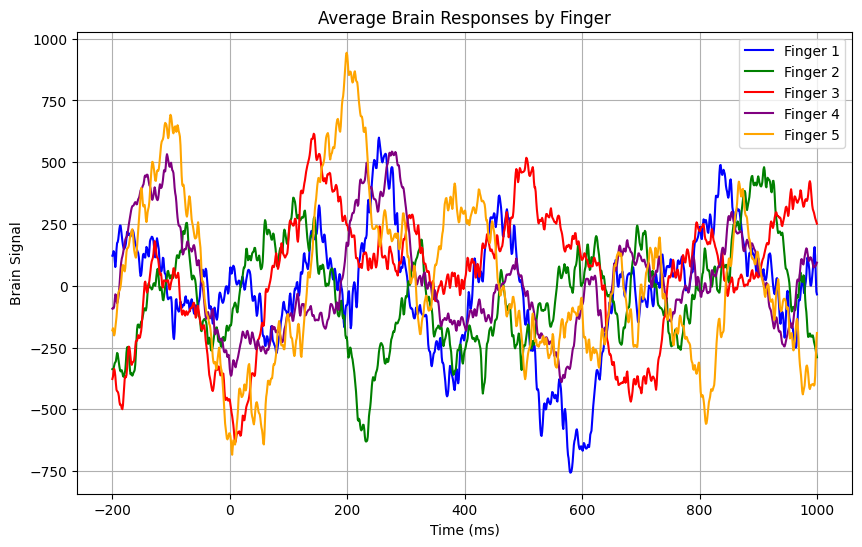

[[ 121.5859375   128.078125    140.1796875  ...   42.8125
   -23.765625    -34.859375  ]
 [-337.725      -338.28333333 -334.625      ... -263.21666667
  -278.08333333 -289.5       ]
 [-377.33333333 -367.99166667 -346.64166667 ...  265.88333333
   258.375       251.18333333]
 [ -92.44736842  -89.54210526  -91.61578947 ...   81.10526316
    87.2          93.63684211]
 [-180.35135135 -171.59459459 -185.48648649 ... -294.05405405
  -222.86486486 -191.21621622]]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calc_mean_erp(trial_points_path, ecog_data_path):
    """
    Calculates the average ERP for each finger based on trial points and brain data.
    
    Returns:
     numpy.ndarray, 5x1201 matrix with the averaged brain responses for each finger and graph.
    """
    # Load trial points and brain data
    trial_df = pd.read_csv(trial_points_path, header=None, names=["Start", "Peak", "Finger"])
    ecog_df = pd.read_csv(ecog_data_path, header=None)
    ecog_signal = ecog_df.iloc[:, 0].values  # Extract the brain signal as a NumPy array

    # Output matrix
    fingers_erp_mean = np.zeros((5, 1201))  # 5 fingers, 1201 time points

    # Process data for each finger
    for finger in range(1, 6): 
        # Filter trials for the current finger
        finger_trials = trial_df[trial_df['Finger'] == finger]

        # Initialize a list to store data for this finger
        finger_erp_data = []

        for _, trial in finger_trials.iterrows():
            start_idx = int(trial['Start'])

            # Define the block: 200 ms before, 1 ms at the starting point, and 1000 ms after
            if start_idx - 200 >= 0 and start_idx + 1000 < len(ecog_signal):
                window = ecog_signal[start_idx - 200: start_idx + 1001]
                finger_erp_data.append(window)

        # Calculate the average ERP for the current finger
        if finger_erp_data:  # Ensure there is data to calculate
            fingers_erp_mean[finger - 1, :] = np.mean(finger_erp_data, axis=0)

    # Plot all averaged brain responses 
    plt.figure(figsize=(10, 6))
    colors = ['blue', 'green', 'red', 'purple', 'orange']  
    time_range = np.arange(-200, 1001)  # Set x-axis range from -200 to 1000 ms
    for finger in range(1, 6):
        plt.plot(time_range, fingers_erp_mean[finger - 1, :], label=f'Finger {finger}', color=colors[finger - 1])
    
    plt.title('Average Brain Responses by Finger')
    plt.xlabel('Time (ms)')
    plt.ylabel('Brain Signal')
    plt.legend()
    plt.grid()
    plt.show()

    return fingers_erp_mean
# File paths
trial_points_path = r"C:\Users\tshas\OneDrive\Documentos\python 2\mini proyect 2\data\events_file_ordered.csv"
ecog_data_path = r"C:\Users\tshas\OneDrive\Documentos\python 2\mini proyect 2\data\brain_data_channel_one.csv"

#Maine

fingers_erp_mean = calc_mean_erp(trial_points_path, ecog_data_path)
print(fingers_erp_mean)
